In [42]:
# Librairies classiques de data analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classe de régression linéaire
from sklearn.linear_model import LinearRegression

# Classes utilisées pour le scaling et le split des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Fonctions et classes utilisées pour tester les hypothèses de la régression linéaire
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from scipy.stats import shapiro

# Classes de différents classificateurs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Classe utilisée pour créer un score personnalisé afin d'évaluer les modèles
from sklearn.metrics import make_scorer

# Classe utilisée pour l'optimisation d'hyperparamètres
from sklearn.model_selection import RandomizedSearchCV
# Classe pour la génération de nombre aléatoire
from scipy.stats import uniform, randint

# Utilisé pour éviter l'affichage de certains warnings 
import warnings
warnings.filterwarnings('ignore')

# Classe utilisée pour la création d'un pipeline
from sklearn.pipeline import Pipeline

# Utilisée pour la création d'une application
from joblib import dump

# Module contenant la fonction description qui décrit les données d'un dataframe
import descr

# Config
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [43]:
billets = pd.read_csv("../Source/billets.csv", sep=";", encoding="utf-8")
print(billets.info())
display(billets.head())
display(billets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


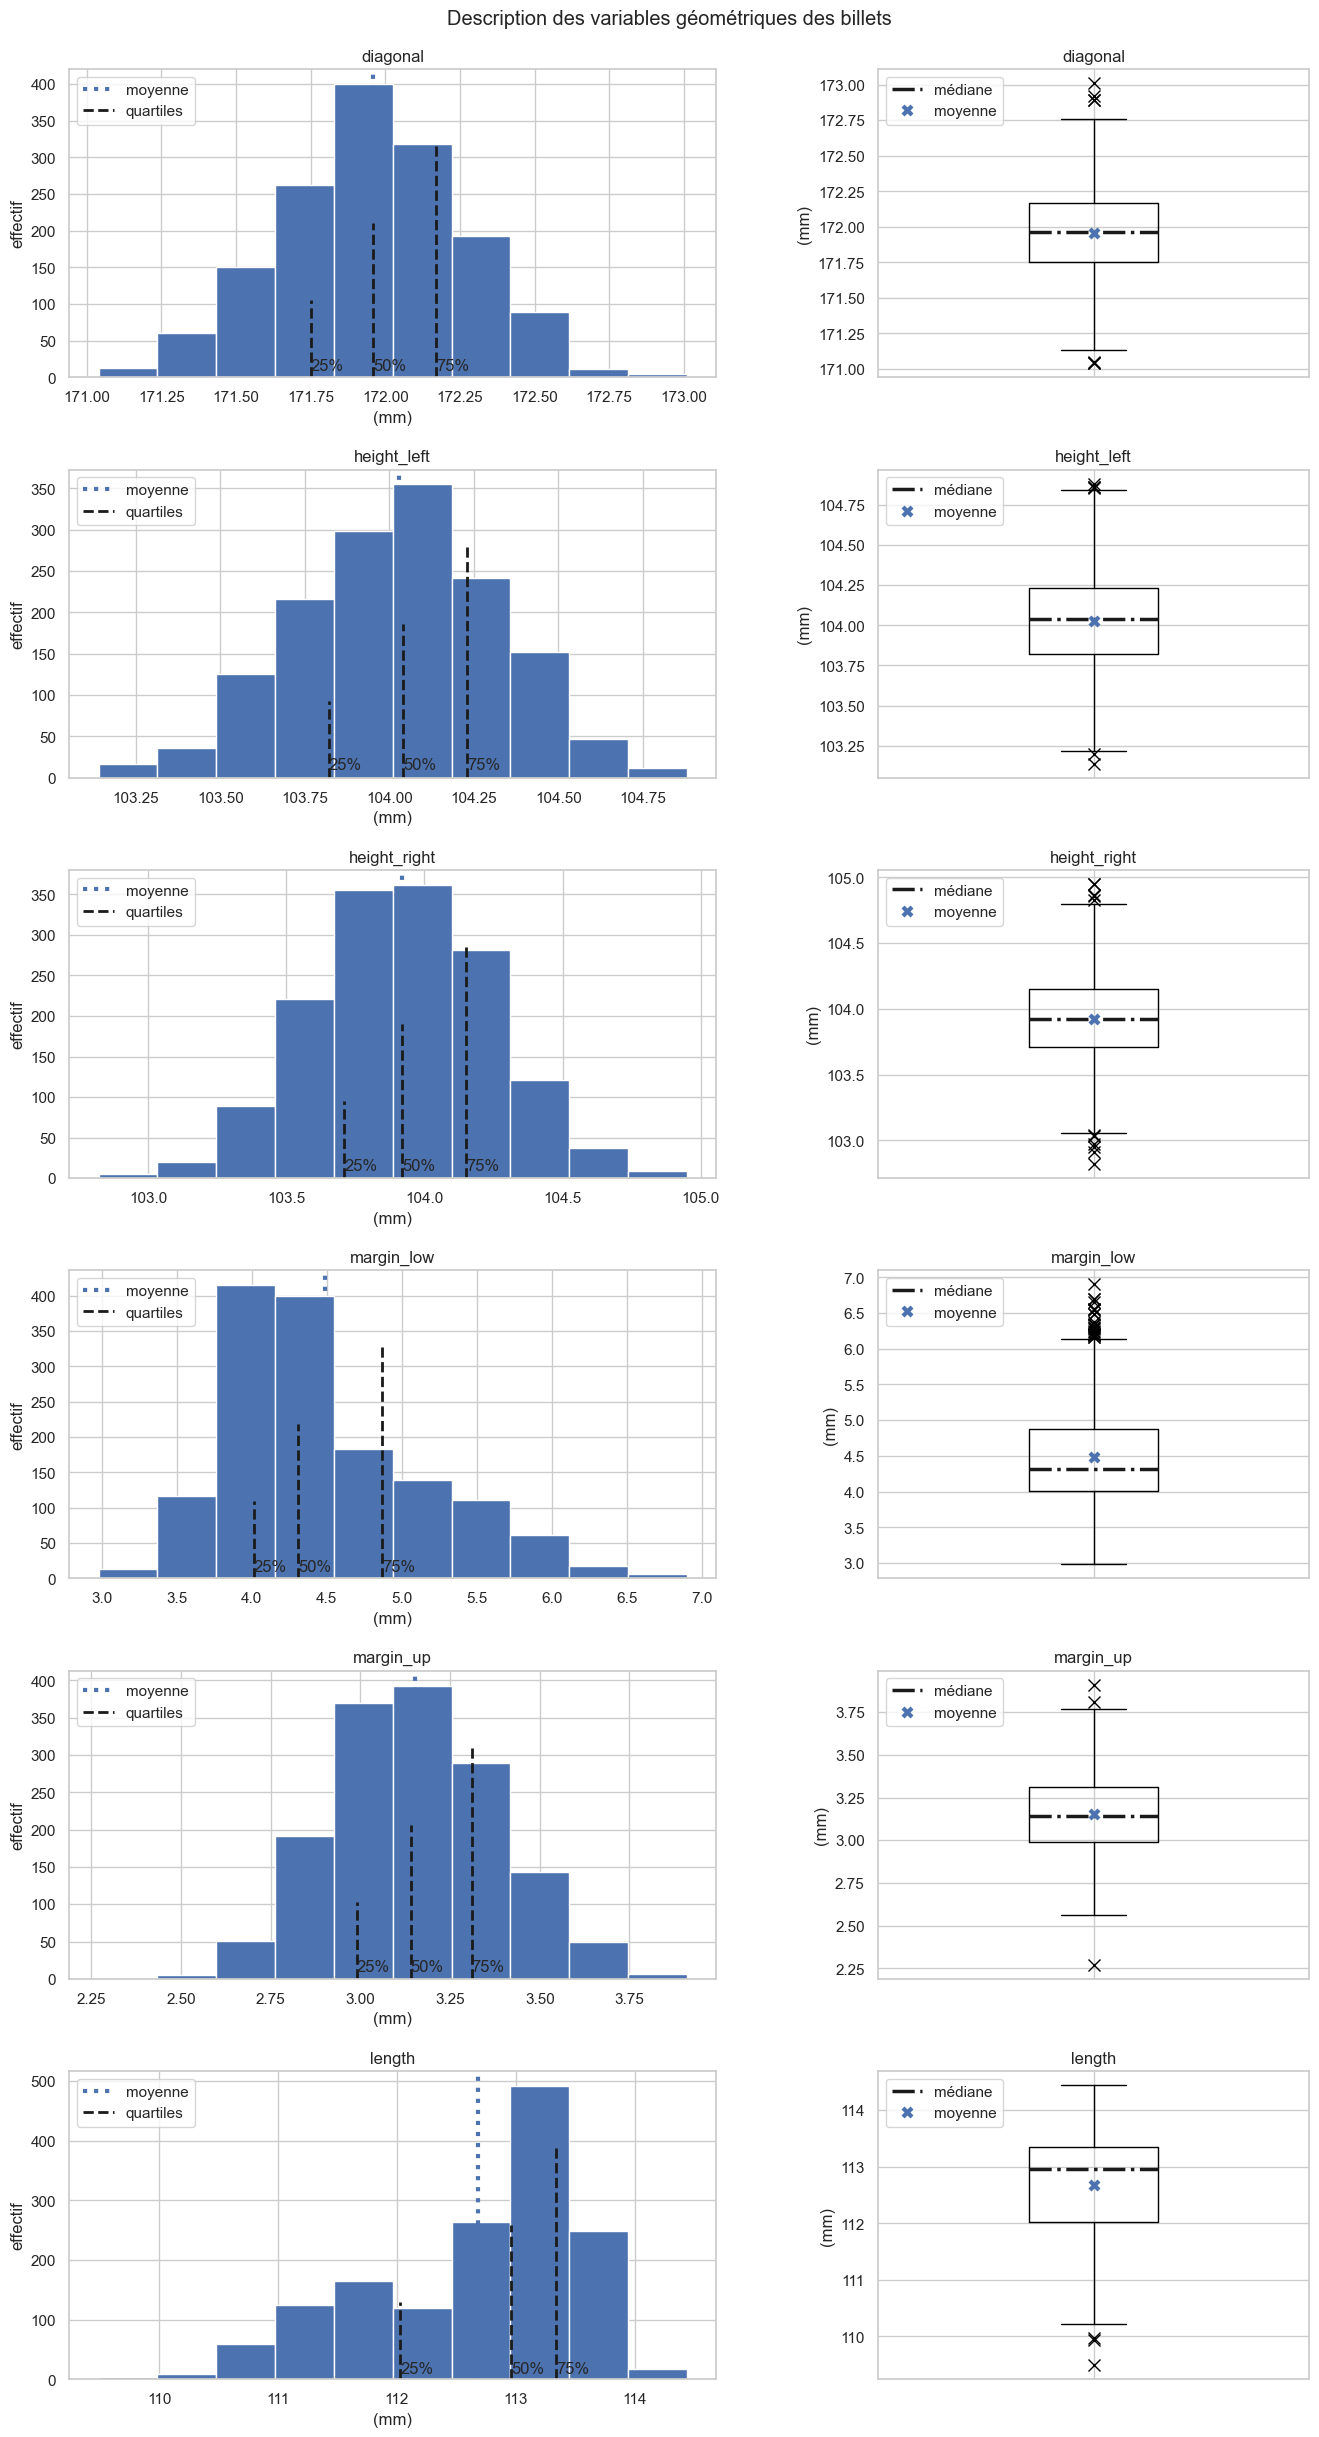

In [ ]:
c=1 # variable d'incrémentation (utilisée sur les noms de variables)
nomsVar = billets.columns # liste des noms des variables
plt.rcParams.update({'font.size': 12}) # paramètres de police d'écriture de matplotlib

fig, ax = plt.subplots(6,2, figsize=(16, 30), gridspec_kw={'width_ratios':[1.5, 1]}) # création de la figure et des plots
fig.suptitle('Description des variables géométriques des billets', y=0.90) # titre de la figure
fig.subplots_adjust(wspace=0.3, hspace=0.3) # hestion de l'espacement entre les plots

# Pour les boxplots
# détails du marqueur de la moyenne
meanpointprops = dict(marker='X', markerfacecolor='b', markeredgecolor='none', markersize=8, label="moyenne") 
medianprops = dict(linestyle='-.', linewidth=2.5, color='k', label="médiane") # détails du marqueur de la médiane
flierpointsprops = dict(marker='x', markersize=8) # détails du marqueur des outliers

# Boucle sur les plots (ax)
for i in ax:
    
    # création d'un histogramme
    i[0].hist(billets[nomsVar[c]].dropna())
    i[0].set_title(nomsVar[c]) # titre de l'histogramme
    
    # Ajout de lignes remarquables
    # ligne à la moyenne
    i[0].axvline(billets[nomsVar[c]].describe()[1], color='b', linestyle='dotted', linewidth=3, label="moyenne") 
    
    # ligne à q1
    i[0].axvline(billets[nomsVar[c]].describe()[4], ymax=0.25, color='k', linestyle='dashed', linewidth=2, label="quartiles") 
    i[0].text(billets[nomsVar[c]].describe()[4], 10, '25%')
    
    # ligne à la mediane
    i[0].axvline(billets[nomsVar[c]].describe()[5], ymax=0.50, color='k', linestyle='dashed', linewidth=2)  
    i[0].text(billets[nomsVar[c]].describe()[5], 10, '50%')
    
    # ligne à q3
    i[0].axvline(billets[nomsVar[c]].describe()[6], ymax=0.75, color='k', linestyle='dashed', linewidth=2)
    i[0].text(billets[nomsVar[c]].describe()[6], 10, '75%')
    
    # légende et grille
    i[0].legend(loc="upper left")
    i[0].set_xlabel('(mm)') # Légende axe x
    i[0].set_ylabel('effectif') # Légende axe y
    i[0].yaxis.grid(True) # Grille
    
    #-----
    
    # Création d'une boîte à moustache
    i[1].boxplot(billets[nomsVar[c]].dropna(), widths=0.3 , showmeans=True, meanprops=meanpointprops,
                 medianprops=medianprops, flierprops=flierpointsprops)
    i[1].set_title(nomsVar[c]) # Titre de la boîte à moustache
    
    # légende et grille
    i[1].legend(loc="upper left")
    i[1].set_xticklabels('')
    i[1].set_ylabel('(mm)') # légende axe y
    i[1].yaxis.grid(True) # grille

    c+=1 # incrémentation

Les histogrammes ont des allures de distributions normales sauf pour la variable margin_low qui est plutôt concentrée à gauche de sa moyenne et la variable length qui est, quant à elle, plutôt concentrée à droite de sa moyenne.

 ## Description des relations entre variables

- Les variables vont être utilisées pour construire des modèles qui détermineront l'authenticité d'un billet, on explore donc les relations qui pourraient exister entre les différentes variables à disposition. Une attention particulière sera prêtée aux variables spécifiquement liées à la conformité d'un billet.

## Matrice de corrélation

linkcode
La matrice de corrélation est d'abord exposée avec sa carte de fréquentation pour mettre en évidence les relations qui pourraient exister entre variables.

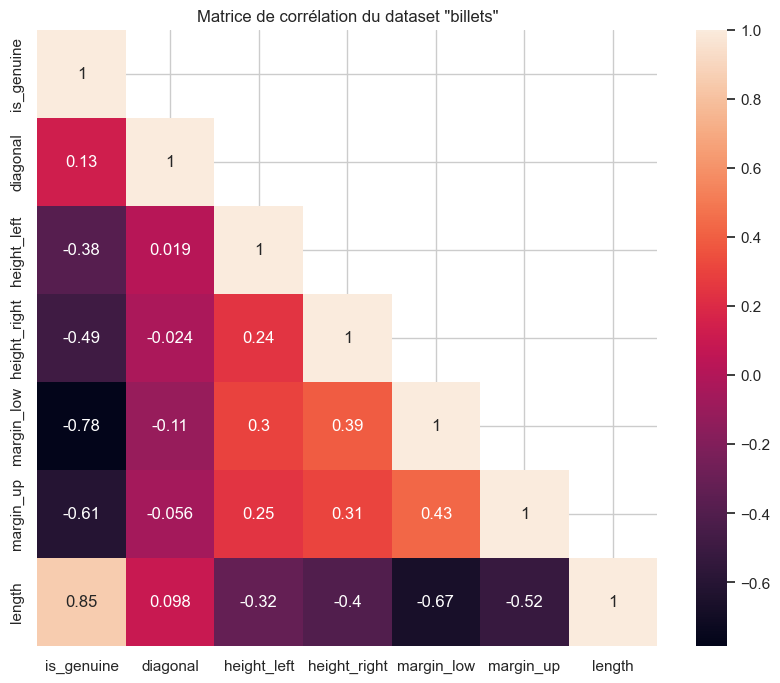

In [45]:
# masque permettant d'obtenir le triangle inferieur de la matrice
maskLowerTriangle = ~np.tril(np.ones(billets.corr().shape)).astype(bool) 

# création de la figure
plt.figure(figsize=(10, 8))
plt.title('Matrice de corrélation du dataset "billets"') 
sns.heatmap(billets.corr(), mask=maskLowerTriangle, annot=True) # carte de fréquentation.
plt.show()

Des corrélations non négligeables sont observables pour certaines variables :

La variable length est corrélée à la variable is_genuine avec un quotient de 0,85.
La variable margin_low est corrélée à la variable is_genuine avec un quotient de -0,78.
Les variables margin_low et length sont corrélées entre elles avec un quotient de -0,67.
Il est noté que la variable margin_up est aussi corrélée à la variable is_genuine avec un quotient de -0,61. Elle semble aussi être corrélée, dans une certaine mesure, à la variable length avec un quotient de -0,52.

## Distribution croisée

Toujours dans le but de souligner les relations qui pourraient exister entre les variables du jeu de données, une description des distributions croisées entre chaques variables est maintenant réalisée.

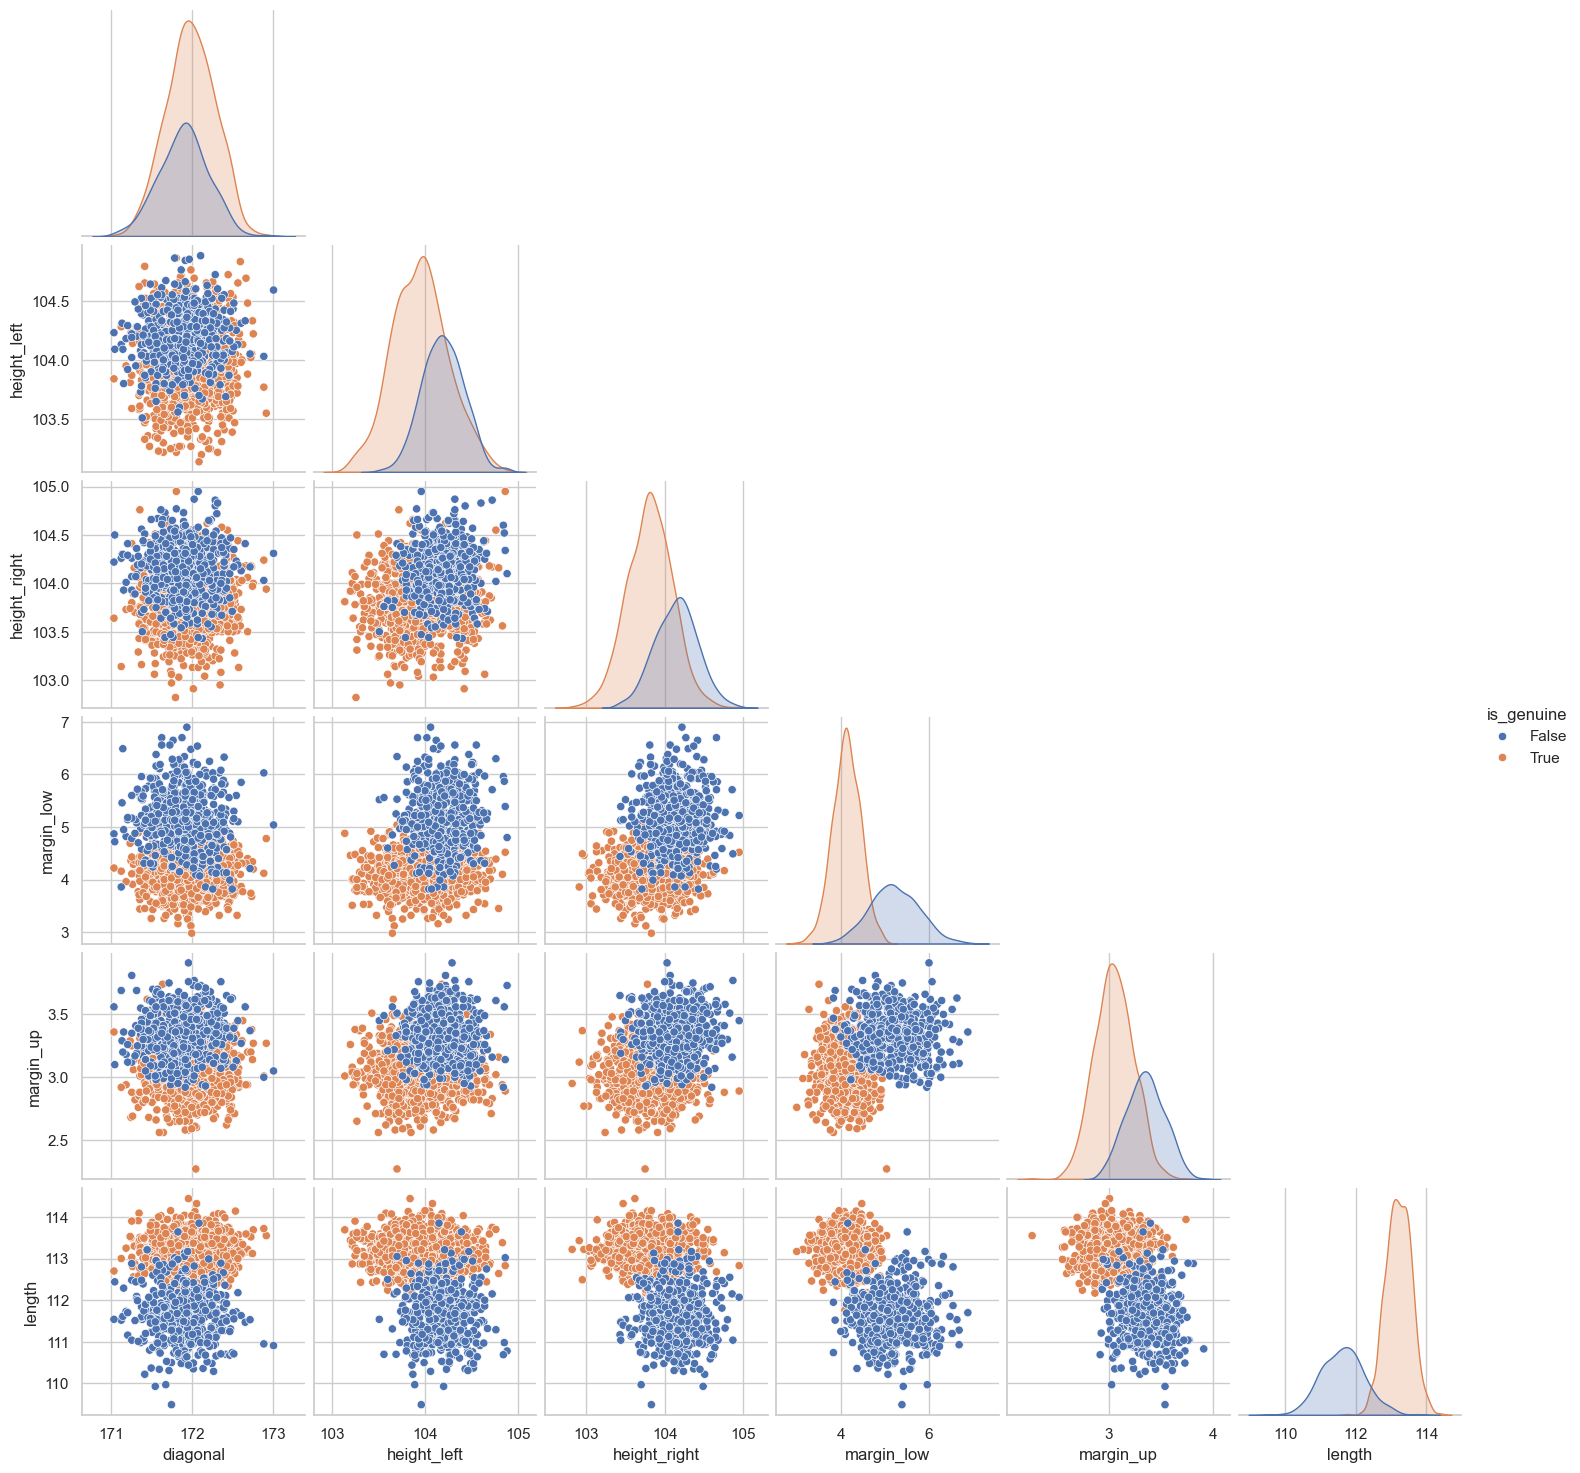

In [46]:
pp=sns.pairplot(billets, hue='is_genuine', corner=True)

Ce pairplot donne plusieurs indices sur la distinction entre vrais et faux billets :

Les courbes de distribution pour la variable length sont plutôt séparées. Les vrais billets ont tendance à être plus grands (autour de 113 mm) que les faux (autour de 112 mm).
De même pour les courbes de distribution de la variable margin_low. Les vrais billets ont tendance à avoir une plus petite marge basse (autour de 4 mm) que les faux billets (autour de 6 mm).
Le nuage de point entre ces deux variables length et margin_low est plutôt distinctement séparé pour les vrais et les faux billets.



Après cette premières analyses, 3 variables semblent sortir du lot pour la discrimination des vrais et faux billets : length, margin_low et margin_up.

Comparaison des distributions entre vrais et faux billets variable par variable

La distribution des variables est à nouveau montrée mais cette fois-ci en distinguant les vrais et faux billets.

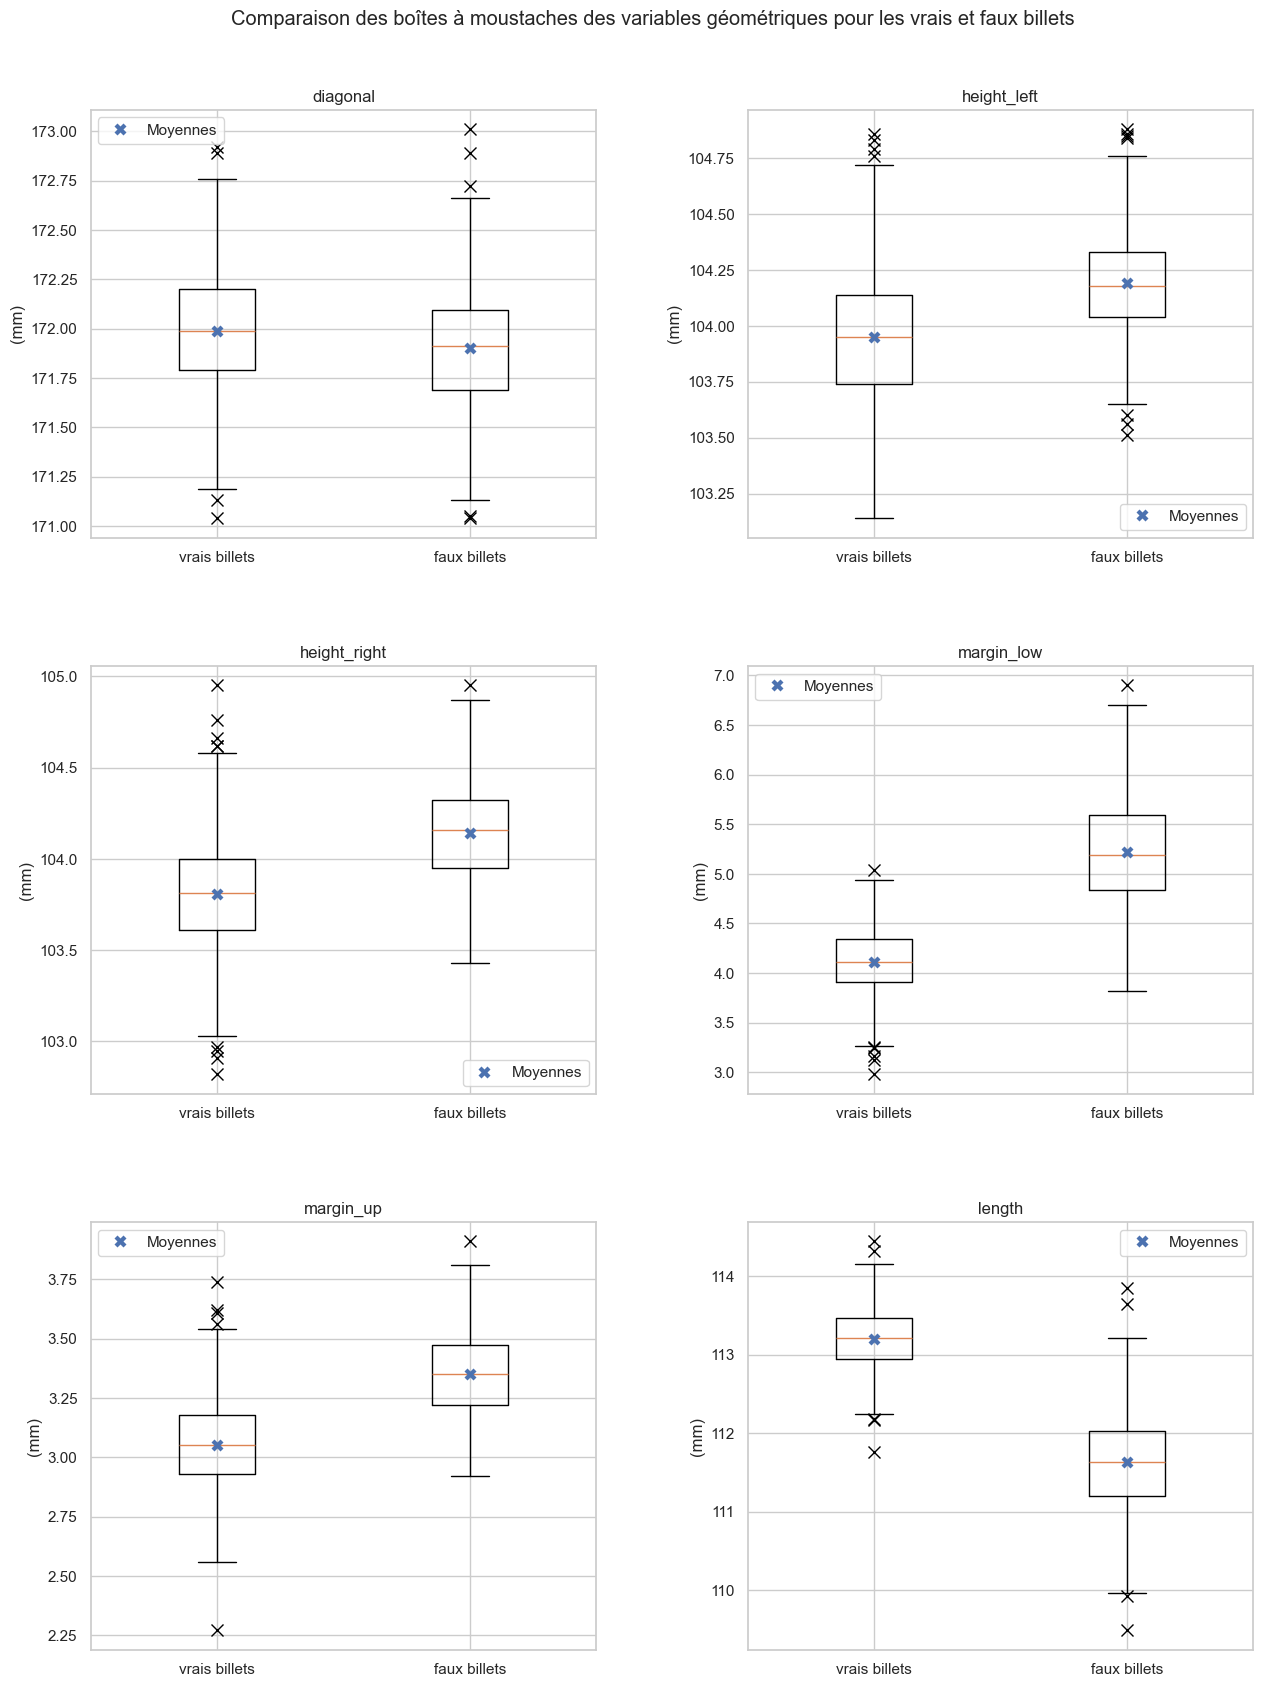

In [47]:
c=1 # reset de la variable d'incrémentation sur les noms de variable 
mask = billets['is_genuine'] # masque des vrais billets

fig, ax = plt.subplots(3,2, figsize=(15, 20)) # création de la figure
# titre de la figure
fig.suptitle('Comparaison des boîtes à moustaches des variables géométriques pour les vrais et faux billets', y=0.93) 
fig.subplots_adjust(wspace=0.3, hspace=0.3) # gestion de l'espacement entre les plots

# Boucle sur les plots (ax)
for i in ax:
    for j in i: 
        # création d'une boîte à moustache
        a = j.boxplot([billets.loc[mask, nomsVar[c]].dropna(), billets.loc[~mask, nomsVar[c]].dropna()], widths=0.3,
                  showmeans=True, meanprops=meanpointprops, flierprops=flierpointsprops)
        j.set_title(nomsVar[c]) # titre de la boîte à moustache
        
        j.legend(handles=a["means"], labels=['Moyennes'])
        j.set_ylabel('(mm)') # légende axe y
        j.set_xticklabels(['vrais billets', 'faux billets']) # légende sur les x
        j.yaxis.grid(True) # grille
        
        c+=1 # incrémentation

Après observation des différents graphiques pour les variables remarquables mises en évidence précédemment, deux règles empiriques de discriminations peuvent être énoncées :

Un vrai billet a une valeur inférieure à 5 mm pour la variable margin_low.
Un vrai billet a une valeur supérieure à 112 mm pour la variable length.
L'observation du diagramme de dispersion des variables margin_low et length centrées réduites confirme que les valeurs de ces deux variables sont fortement associées à la valeur de is_genuine

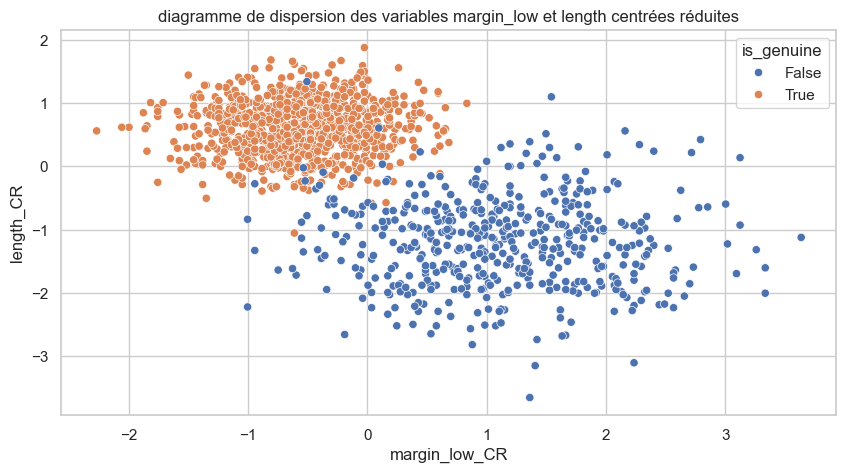

In [48]:
# création de nouvelles colonnes avec valeurs centrées réduites
billets['length_CR'] = (billets['length'] - billets['length'].describe()[1])/billets['length'].describe()[2]
billets['margin_low_CR'] = (billets['margin_low'] - billets['margin_low'].describe()[1])/billets['margin_low'].describe()[2]

# Affichage du scatterplot
scartterCR = sns.scatterplot(data=billets, x='margin_low_CR', y='length_CR', hue='is_genuine').set(title='diagramme de dispersion des variables margin_low et length centrées réduites')

Cette exploration des données fait ressortir plusieurs variables pertinentes pour déterminer si un billet est vrai ou faux : length, margin_low et dans une moindre mesure margin_up. Cependant, la variable margin_low qui semble nécéssaire à l'authentification de billets présente des valeurs manquantes. Une imputation des ces valeurs permettrait d'utiliser cette variable importante pour l'entraînement des modèles de classification que l'on souhaite créer.

Régression linéaire pour imputer les valeurs manquantes de la variable ```margin_low```
L'analyse explortoire du jeu de données a montré la relation forte entre l'authenticité d'un billet et la variable margin_low. Néanmoins cette variable essentielle présente des valeurs manquantes. Il est proposé ici d'utiliser une régression linéaire pour les imputer.

Régression linéaire multiple

Un premier modèle est calculé avec toutes les variables à disposition pour estimer margin_low.

In [49]:

billetsNonVide = billets.copy().dropna() # dataset sans lignes avec données manquantes
X = billetsNonVide[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']] # dataframe des régresseurs

# Régression linéaire multiple
regLinMul = LinearRegression().fit(X, billetsNonVide['margin_low'])

# R²
R2mul = regLinMul.score(X, billetsNonVide['margin_low'])

print('R² = {}\nCoefficient constant : {}\nCoefficients : {}'.format(R2mul, regLinMul.intercept_, regLinMul.coef_))

R² = 0.4773366973063957
Coefficient constant : 22.99484271444794
Coefficients : [-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]


Régression linéaire simple

Un second modèle est calculé uniquement à partir de la variable length qui est corrélée à margin_low avec un quotient de -0,67.

In [50]:
# Regression linéaire simple et R²
regLin = LinearRegression().fit(billetsNonVide[['length']], billetsNonVide['margin_low'])
R2 = regLin.score(billetsNonVide[['length']], billetsNonVide['margin_low'])

print('R² = {}\nCoefficient constant : {}\nCoefficient : {}'.format(R2, regLin.intercept_, regLin.coef_))

R² = 0.4445592708293491
Coefficient constant : 61.59600862470531
Coefficient : [-0.50685746]


La régression linéaire simple a un coefficient de détermination proche de celui de la régression linéaire multiple. Ce modèle nécessitant moins de variables est plus robuste et sera privilégié.

Vérification des présupposés de la régression linéaire

Avant d'utiliser la régression linéaire pour faire de l'estimation de valeur, il faut s'assurer qu'elle est utilisée de manière licite en vérifiant ses présupposés.

Colinéarité des variables

Le facteur d'inflation de la variance (VIF) est calculé pour vérifier la non colinéarité des variables explicatives.

In [51]:
# Création d'un dataframe qui affichera les résultats 
VIF = pd.DataFrame()
# ajout d'une constante pour l'utilisation de la fonction variance_inflation_factor
Xconst = X.copy()
Xconst['const'] = 1 

VIF['feature'] = Xconst.columns # liste des variables de régression 
VIF['VIF'] = [variance_inflation_factor(Xconst, i) for i in range(Xconst.shape[1])] # valeurs du VIF 

display(VIF)

,feature,VIF
0,diagonal,1.013613
1,height_left,1.138261
2,height_right,1.230115
3,margin_up,1.404404
4,length,1.576950
5,const,590198.238883


Toutes les valeurs de VIF sont inférieures à 10. Il n'existe pas de problèmes de colinéarité entre les variables.

Homoscédasticité des résidus

Pour vérifier l'homoscédasticité des résidus, un diagramme de dispersion des résidus est affiché et un test de Breush-Pagan est réalisé. Le test de Breush-Pagan prend comme hypothèse 
H
0
 l'homoscédasticité des résidus et
H
1
 leur hétéroscédasticité.

Cas de la régression linéaire multiple

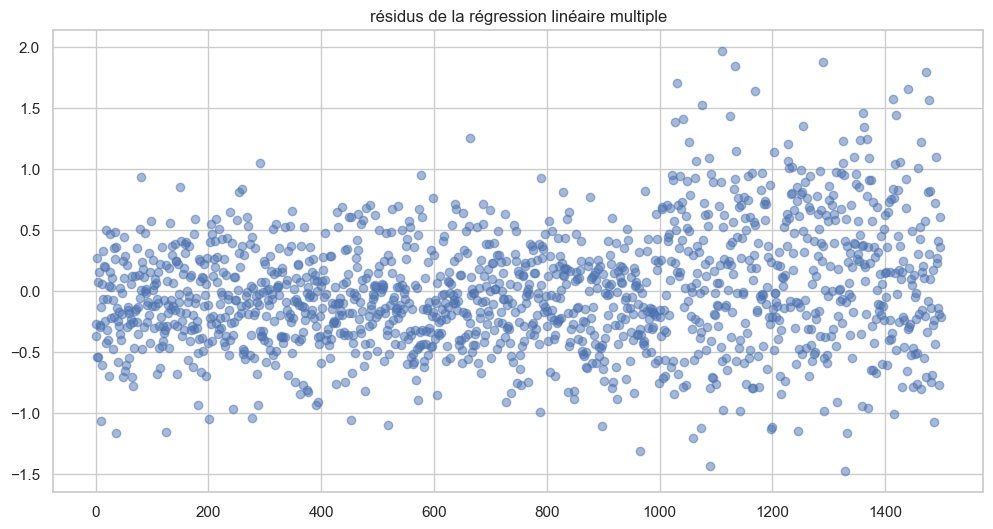

In [52]:
predictionsMul = regLinMul.predict(X) # estimation à partir du modèle de régression linéaire multiple
residusMul = billetsNonVide['margin_low'] - predictionsMul # calcul des résidus 

# Création de la figure
plt.subplots(figsize=(12, 6))
plt.scatter(residusMul.index, residusMul, alpha=0.5)
t=plt.title('résidus de la régression linéaire multiple')


Le diagramme de dispersion des résidus de la régression linéaire multiple montre une inconstance de répartition entre les ~1050 premiers résidus et les suivants.

In [53]:
# Création d'un dataframe qui affichera les résultats 
homoscedaMul = pd.DataFrame()
homoscedaMul['Breush-Pagan name'] = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
homoscedaMul['Breush-Pagan test'] = sms.het_breuschpagan(residusMul, Xconst)

display(homoscedaMul)

,Breush-Pagan name,Breush-Pagan test
0,Lagrange multiplier statistic,8.016261e+01
1,p-value,7.759535e-16
2,f-value,1.689236e+01
3,f p-value,2.922750e-16


On trouve une valeur p inférieure à 0.05, l'hypothèse  
H
0
  de l'homoscédasticité des résidus est rejetée. Cela concorde avec ce qui a été vu sur le diagramme de dispersion des résidus.

Cas de la régression linéaire simple

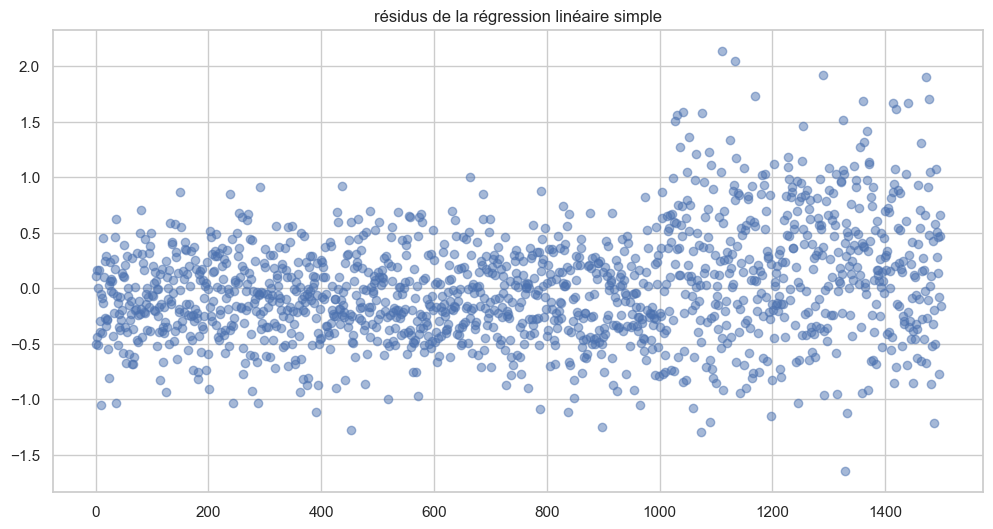

In [54]:
predictions = regLin.predict(billetsNonVide[['length']]) # estimation à partir du modèle de régression linéaire simple
residus = billetsNonVide['margin_low'] - predictions # calcul des résidus 

# Création de la figure
plt.subplots(figsize=(12, 6))
plt.scatter(residus.index, residus, alpha=0.5)
t=plt.title('résidus de la régression linéaire simple')

Comme précédement, le diagramme de dispersion des résidus de la régression linéaire simple montre une inconstance de répartition entre les ~1050 premiers résidus et les suivants.

In [55]:
# Création d'un dataframe qui affichera les résultats 
homosceda = pd.DataFrame()
homosceda['Breush-Pagan name'] = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
homosceda['Breush-Pagan test'] = sms.het_breuschpagan(residus, Xconst[['length', 'const']])
display(homosceda)

,Breush-Pagan name,Breush-Pagan test
0,Lagrange multiplier statistic,6.090274e+01
1,p-value,5.996541e-15
2,f-value,6.346129e+01
3,f p-value,3.263714e-15



On trouve une valeur p inférieure à 0.05, l'hypothèse  
H
0
  de l'homoscédasticité des résidus est rejetée. Ce qui concorde avec ce qui a été vu sur le diagramme de dispersion des résidus.

Normalité des résidus

Enfin, pour vérifier la normalité des résidus, un diagramme de distribution des résidus est créé et un test de Shapiro-Wilk est effectué. Le test de Shapiro-Wilk teste l'hypothèse 
H
0
 d'un échantillon normalement distribué.

Cas de la régression linéaire multiple

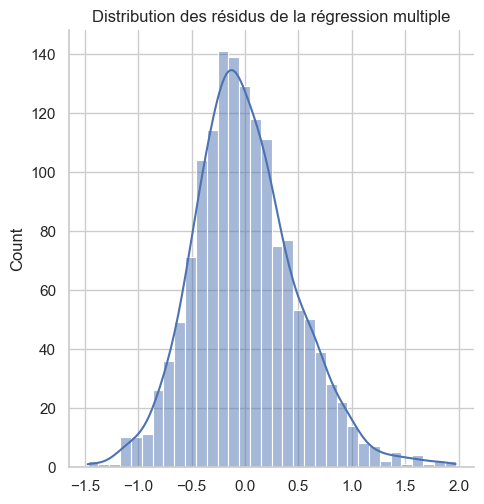

In [56]:
# Diagramme de distribution
sns.displot(residusMul.values,kde=True)
t=plt.title('Distribution des résidus de la régression multiple')


La distribution des résidus a une allure de distribution normale.

In [57]:
shapiro(residusMul)

ShapiroResult(statistic=np.float64(0.9857882577573783), pvalue=np.float64(8.540407842394512e-11))

linkcode
On trouve une valeur p inférieure à 0.05 au test de Shapiro-Wilk, l'hypothèse  
H
0
  d'un échantillon normalement distribué est rejetée. Cela va à l'encontre de ce qui est observé sur l'histogramme des résidus.

Cas de la régression linéaire simple

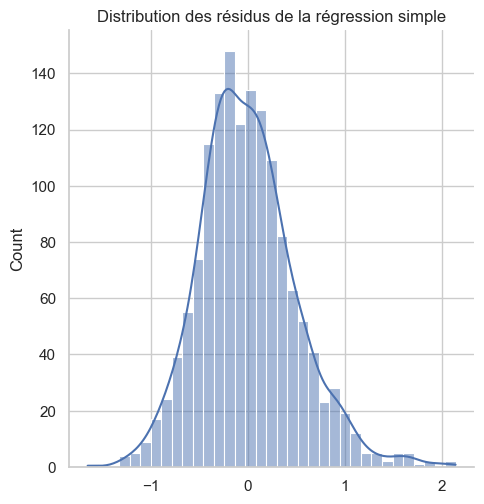

In [58]:
# diagramme de distribution
sns.displot(residus.values,kde=True)
t=plt.title('Distribution des résidus de la régression simple')

La distribution des résidus a une allure de distribution normale.

In [59]:
shapiro(residus)

ShapiroResult(statistic=np.float64(0.9824796531420292), pvalue=np.float64(2.3942672551450033e-12))

On trouve une valeur p inférieure à 0.05, l'hypothèse  
H
0
  d'un échantillon normalement distribué est rejetée. Cela va, à nouveau, à l'encontre de ce qui est observé sur l'histogramme des résidus.

Les hypothèses sur les résidus sont rejetées par les tests réalisés. Néanmoins, le fait que l'échantillon soit de taille largement suffisante (plus de 1000 individus) permet de dire que les résultats obtenus par le modèle linéaire ne sont pas absurdes, même si le résidu n'est pas considéré gaussien.

Estimation des valeurs de ```margin_low```

Le modèle de régression liénaire étant créé, il est desormais possible de l'utiliser pour estimer les valeurs manquantes de margin_low.

In [ ]:
billets['margin_low'] = np.where(billets['margin_low'].isna(), regLin.predict(billets[['length']]), billets['margin_low'])

Après cette imputation de valeurs pour margin_low, toutes les variables disponibles sont utilisables pour l'entraînement de modèles de classification. Cependant, avant de procéder à cette phase d'apprentissage il serait judicieux de déterminer une façon de comparer les performances des futurs algorithmes. Cela permettra de sélectionner celui qui répondra au mieux à la problématique d'identification de billets.

Création d'un score pour évaluer les modèles
Afin d'évaluer les différents modèles qui seront examinés dans la suite du projet, il est proposé de créer une métrique qui permettra de noter la performance de ces modèles.

Pour rappel, une règle empirique de discrimination avait été énoncée auparavant :

Un vrai billet a une valeur inférieure à 5 mm pour la variable margin_low.
Un vrai billet a une valeur supérieure à 112 mm pour la variable length.
Les résultats de l'authentification des billets obtenus par cette règle sont montrés dans une matrice de confusion :

In [61]:
# nouvelle colonne : authentification des billets par la règle empirique
billets['vraiBilletEmpirique'] = np.where((billets['margin_low'] < 5) & (billets['length'] > 112), 1, 0)

# matrice de confusion
pd.crosstab(billets['vraiBilletEmpirique'], billets['is_genuine'], margins=True)

is_genuine,False,True,All
vraiBilletEmpirique,,,
0,451,2,453
1,49,998,1047
All,500,1000,1500


Les vrais billets sont plutôt bien détectés mais beaucoup de faux billets ont été déclarés vrai. Or, cette erreur est la plus dommageable possible. En effet, il est considéré plus grave de déclarer un faux billet comme véritable que l'inverse (déclarer un vrai billet comme faux). Aussi, un algorithme sera considéré plus performant s'il repère bien les faux billets, plutôt que les billets qui sont vrais.

Ainsi à chaque type d'erreur sera attribué un poids dans le score, de même pour les identifications correctes :

Vrai négatif : +2
Vrai positif : +1
Faux positif : -10
Faux négatif : -5

In [62]:
def score(mesures, predictions, showTab=False) : 
    
    # matrice de confusion
    tab = pd.crosstab(predictions, mesures, margins=True)
    if showTab:
        display(tab) # la matrice de confusion est affichée si showTab=True
    
    score = tab.iloc[0,0] * 2        # +2 pour un vrai négatif
    score += tab.iloc[0,1] * (-5)    # -5 pour un faux négatif
    score += tab.iloc[1,0] * (-10)   # -10 pour un faux positif
    score += tab.iloc[1,1] * 1       # +1 pour un vrai positif
    scoreMax = tab.iloc[2,0] * 2 + tab.iloc[2,1] # score maximal possible
    
    return score.sum()/scoreMax

In [63]:
print('Le score de la règle empirique est de {:.3f}'.format(score(billets['is_genuine'], billets['vraiBilletEmpirique'], showTab=True)))

is_genuine,False,True,All
vraiBilletEmpirique,,,
0,451,2,453
1,49,998,1047
All,500,1000,1500


Le score de la règle empirique est de 0.700


Lorsque le score est testé sur la règle empirique établie précédemment, elle obtient une note de 70%. Cela indique que les performances de cette méthode ne sont pas optimales. L'utilisation de modèles de classification pourrait permettre d'obtenir des outils de détection plus performants.

Modèles de classification
Dans cette section différents modèles de classification vont être entraînés et testés dans le but d'obtenir un algorithme performant pour la distiction des vrais et faux billets.

Essaies de différents modèles

Plusieurs modèles de classification vont être entraînés et comparés afin de déterminer quel modèle est le plus adapté aux données disponibles. La variable cible des modèles sera is_genuine et les variables explicatives seront les autres variables de dimensions des billets dont la variable margine_low avec valeurs imputées.

In [64]:
# Varible cible : billets['is_genuine']
# Varibles explicatives :
X = billets[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length',]].copy() 

Les modèles nécessitent l'utilisation de données centrées réduites. Cette étape de scaling est donc exécutée.

Pour rappel, centrer des données équivaut à y soustraire leur moyenne  
X
−
μ
  et les réduire équivaut à les diviser par leur écart type  
X
σ
 .

In [65]:
# Centrer et réduire les variables explicatives
scaler = StandardScaler()
Xcr = scaler.fit_transform(X)

Ensuite, les données sont séparées en un groupe de données d'entraînement et un groupe de test. C'est l'étape de splitting.

In [66]:
# Splitter les données
X_train, X_test, y_train, y_test = train_test_split(Xcr, billets['is_genuine'], test_size=(1/3), random_state=0)

Désormais, différents modèles peuvent être entraînés :

la régression logistique : modèle de classification de variables binaires basé sur la régression linéaire mais qui ajuste une fonction Logit (ayant ses valeurs entre 0 et 1) plutôt qu'une fonction linéaire.

l'arbre de décision : sépare successivement les données selon une condition en essayant d'obtenir des groupes les plus purs possible à chaque nœud.

la forêt aléatoire : ensemble de modèles d'arbre de décision, la décision finale est une homogénéisation des décisions des arbres de la forêt.

les plus proches voisins : classe une nouvelle observation dans le groupe majoritaire des k plus proches voisins. Des voisins étant des individus avec des caractéristiques proches.

In [67]:
# Entraînement des modèles

# Régression logistique
regLog = LogisticRegression(random_state=0)
regLog.fit(X_train, y_train)

# Forêt aléatoire
randomFo = RandomForestClassifier(random_state=0)
randomFo.fit(X_train, y_train)

# Arbre de décision
arbreDec = DecisionTreeClassifier(random_state=0)
arbreDec.fit(X_train, y_train)

# Plus proches voisins
nearNei = KNeighborsClassifier()
nearNei.fit(X_train, y_train)
print()

In [68]:
print('Score de la régression logistique : {:.3f}'.format(score(y_train, regLog.predict(X_train), showTab=True)))
print('Score de la forêt aléatoire : {:.3f}'.format(score(y_train, randomFo.predict(X_train), showTab=True)))
print("Score de l'arbre de décision : {:.3f}".format(score(y_train, arbreDec.predict(X_train), showTab=True)))
print('Score des plus proches voisins : {:.3f}'.format(score(y_train, nearNei.predict(X_train), showTab=True)))

is_genuine,False,True,All
row_0,,,
False,319,5,324
True,7,669,676
All,326,674,1000


Score de la régression logistique : 0.914


is_genuine,False,True,All
row_0,,,
False,326,0,326
True,0,674,674
All,326,674,1000


Score de la forêt aléatoire : 1.000


is_genuine,False,True,All
row_0,,,
False,326,0,326
True,0,674,674
All,326,674,1000


Score de l'arbre de décision : 1.000


is_genuine,False,True,All
row_0,,,
False,321,3,324
True,5,671,676
All,326,674,1000


Score des plus proches voisins : 0.941


Le score sur les données de test est évalué.

In [69]:
print('Score de la régression logistique : {:.3f}'.format(score(y_test, regLog.predict(X_test), showTab=True)))
print('Score de la forêt aléatoire : {:.3f}'.format(score(y_test, randomFo.predict(X_test), showTab=True)))
print("Score de l'arbre de décision : {:.3f}".format(score(y_test, arbreDec.predict(X_test), showTab=True)))
print('Score des plus proches voisins : {:.3f}'.format(score(y_test, nearNei.predict(X_test), showTab=True)))

is_genuine,False,True,All
row_0,,,
False,171,1,172
True,3,325,328
All,174,326,500


Score de la régression logistique : 0.938


is_genuine,False,True,All
row_0,,,
False,173,2,175
True,1,324,325
All,174,326,500


Score de la forêt aléatoire : 0.964


is_genuine,False,True,All
row_0,,,
False,170,7,177
True,4,319,323
All,174,326,500


Score de l'arbre de décision : 0.866


is_genuine,False,True,All
row_0,,,
False,170,2,172
True,4,324,328
All,174,326,500


Score des plus proches voisins : 0.911


Voici un tableau récaputulatif des scores de chaque modèle sur les données d'entraînement et de test.

In [70]:
# Nouveau dataframe utilisé pour afficher les résultats des différents modèles 
scoreTab = pd.DataFrame()
# Nom des modèles
scoreTab['Modèle'] = ["Régression logistique", "Forêt aléatoire", "Arbre de décision", "Plus proches voisins"]
# score données d'entraînement
scoreTab["Données d'entraînement"] = [round(score(y_train, regLog.predict(X_train)),3), round(score(y_train, randomFo.predict(X_train)),3),
                                      round(score(y_train, arbreDec.predict(X_train)),3), round(score(y_train, nearNei.predict(X_train)),3)]
# score données de test
scoreTab["Données de test"] = [round(score(y_test, regLog.predict(X_test)),3), round(score(y_test, randomFo.predict(X_test)),3), 
                               round(score(y_test, arbreDec.predict(X_test)),3), round(score(y_test, nearNei.predict(X_test)),3)]
display(scoreTab)

,Modèle,Données d'entraînement,Données de test
0,Régression logistique,0.914,0.938
1,Forêt aléatoire,1.000,0.964
2,Arbre de décision,1.000,0.866
3,Plus proches voisins,0.941,0.911


La régression logistique a le plus mauvais score sur les données d'entraînement mais est deuxième sur les données de test, ce modèle a un bon potentiel d'estimation bien qu'il ne soit pas parfaitement ajusté. Il sera conservé pour l'étape d'hyperparamétrisation.

Les modèles d'arbre de décision et de forêt aléatoire ont un score parfait sur les données d'entraînement, ils sont donc très bien ajustés. Cependant, le modèle d'arbre de décision est le moins bon sur les données de test, il y a un surajustement. Le modèle de Forêt aléatoire quant à lui est le meilleur sur les données de test, son approche ensembliste peut en effet permettre de corriger les problèmes de surajustement de certains modèles simples. Ce modèle sera donc conservé pour l'étape d'hyperparamétrisation.

hyperparamétrisation

Cette section est dédié à l'hyperparamétrisation des deux modèles selectionnés. L'objectif de l'hyperparamétrisation est de trouver des valeurs d'hyperparamètres permettant d'optimiser les capacité de prédiction d'un modèle.

Le score précédemment mis en place sera utilisé pour évaluer les performances des modèles pour les différents hyperparamètres testés.

In [71]:
scoreHypPara = make_scorer(score)

Régression logistique

Pour la régression logistique, 5 hyperparamètres seront optimisés :

C : Contrôle la force de la régularisation. Un C plus grand signifie moins de régularisation et donc des poids de modèle plus élevés (et potentiellement une meilleure performance sur l'ensemble de test, mais un risque accru de surajustement). Inversement, un C plus petit signifie plus de régularisation et donc des poids de modèle plus petits (mais un risque réduit de surajustement).

penalty : Désigne le type de régularisation utilisé : L1 ajoute une pénalité absolue sur les poids et L2 ajoute une pénalité quadratique sur les poids.

solver : Choix de l'algorithme utilisé pour entraîner le modèle.

fit_intercept : Indique si le modèle doit apprendre un intercept (un biais) ou non.

tol : Contrôle la tolérance de l'algorithme du solver. Cela détermine un seuil où l'algorithme considère avoir convergé vers une solution optimale.

In [72]:
# liste des paramètres à optimiser
param_grid = {'C': uniform(0, 50),
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'fit_intercept': [True, False],
              'tol': uniform(1e-9, 1e-3)
             }

# création de la grille de recherche
random_search = RandomizedSearchCV(regLog, param_grid, cv=10, n_iter=50, random_state=0, scoring=scoreHypPara)

# entraînement de la grille de recherche avec les données d'entraînement
random_search.fit(X_train, y_train)

# affichage des meilleurs hyperparamètres
print(random_search.best_params_)

{'C': np.float64(26.092416087503583), 'fit_intercept': True, 'penalty': 'l2', 'solver': 'sag', 'tol': np.float64(0.00018633334332675996)}


Le meilleurs hyperparamètres étant déterminés pour la régression ligistique, il est possible d'entraîner un nouveau modèle avec ces paramètres.

In [73]:
# Création d'un nouveau modèle en utilisant les hyperparamètres trouvés 
regLog2 = LogisticRegression(C= 26.092416087503583, fit_intercept= True, penalty= 'l2', solver= 'sag',
                             tol= 0.00018633334332675996)
regLog2.fit(X_train, y_train)

print("Score sur les données d'entraînement : {:.3f}".format(score(y_train, regLog2.predict(X_train), showTab=True)))
print('Score sur les données de test : {:.3f}'.format(score(y_test, regLog2.predict(X_test), showTab=True)))

is_genuine,False,True,All
row_0,,,
False,319,4,323
True,7,670,677
All,326,674,1000


Score sur les données d'entraînement : 0.919


is_genuine,False,True,All
row_0,,,
False,171,1,172
True,3,325,328
All,174,326,500


Score sur les données de test : 0.938


Après l'étape d'hyperparamétrisation la nouvelle régression logistique obtient un meilleur score sur les données d'entraînement : 0.919 pour 0.905 auparavant, et le même score de 0.938 sur les données de test.

Forêt aléatoire

Pour la forêt aléatoire, 6 hyperparamètres ont été selectionnés pour être optimisés :

n_estimators : Le nombre d'arbres de décision de la forêt. Plus il y a d'arbres, plus la forêt est capable de capturer la complexité des données, mais cela augmente également le temps de calcul.

max_depth : La profondeur maximale de chaque arbre de la forêt. Une profondeur élevée permet à l'arbre de capturer plus de complexité dans les données, mais il y a un risque de surapprentissage.

min_samples_split : Le nombre minimum de samples requis pour diviser un noeud.

min_samples_leaf : Le nombre minimum de samples requis pour être à la feuille d'un noeud.

bootstrap : Détermine si les échantillons sont tirés avec ou sans remise lors de la construction des arbres de la forêt.

criterion : La fonction de coût utilisée pour mesurer la qualité de chaque séparation.

In [74]:
# liste des paramètres à optimiser
param_gridRF = {"n_estimators": randint(10, 1000),
                "max_depth": randint(1, 100),
                "min_samples_split": randint(2, 100),
                "min_samples_leaf": randint(1, 100),
                "bootstrap": [True, False],
                "criterion": ['gini', 'entropy']}

# création de la grille de recherche
random_searchRF = RandomizedSearchCV(randomFo, param_gridRF, cv=5, n_iter=50, random_state=0, scoring=scoreHypPara)

# entraînement de la grille de recherche avec les données d'entraînement
random_searchRF.fit(X_train, y_train)

# affichage des meilleurs hyperparamètres
print(random_searchRF.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 73, 'min_samples_leaf': 10, 'min_samples_split': 22, 'n_estimators': 125}


Le meilleurs hyperparamètres étant déterminés pour la forêt aléatoire, il est possible d'entraîner un nouveau modèle avec ces paramètres.

In [75]:
# Création d'un nouveau modèle en utilisant les hyperparamètres trouvés 
randomFo2 = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_depth = 32, min_samples_leaf = 2, 
                                   min_samples_split = 67, n_estimators = 947, random_state=0)
randomFo2.fit(X_train, y_train)
print("Score sur les données d'entraînement : {:.3f}".format(score(y_train, randomFo2.predict(X_train), showTab=True)))
print('Score sur les données de test : {:.3f}'.format(score(y_test, randomFo2.predict(X_test), showTab=True)))

is_genuine,False,True,All
row_0,,,
False,318,2,320
True,8,672,680
All,326,674,1000


Score sur les données d'entraînement : 0.919


is_genuine,False,True,All
row_0,,,
False,173,1,174
True,1,325,326
All,174,326,500


Score sur les données de test : 0.973


Après l'étape d'hyperparamétrisation la nouvelle forêt aléatoire obtient un moins bon score sur les données d'entraînement : 0.919 pour 1.0 auparavant. Cependant, score sur les données test est meilleur : 0.973 contre 0.964 précédemment. Ce score étant aussi meilleur que celui de la régression logistique hyperparamétrée (0.938), c'est cette version du modèle de forêt aléatoire qui sera choisi pour la création de l'application finale.

Création de la solution finale
Le modèle qui sera utilisé pour distinguer les vrais et faux billets est désormais construit et intégrable à une application destinée à l'utilisateur.

Création d'un pipeline

L'application finale est créée via un pipeline qui permet d'automatiser l'étape de mise à l'échelle des données et l'étape de prédiction.

In [76]:
# étapes du pipeline
steps = [('scaler', StandardScaler()), ('classifier', RandomForestClassifier(bootstrap = True, criterion = 'gini',
                                                                             max_depth = 32, min_samples_leaf = 2,
                                                                             min_samples_split = 67, n_estimators = 947,
                                                                             random_state=0))]
pipeline = Pipeline(steps) # initialisation du pipeline

# séparation des données (sans les centrer réduire avant)
X_train, X_test, y_train, y_test = train_test_split(X, billets['is_genuine'], test_size=(1/3), random_state=0)

pipeline.fit(X_train, y_train)

print("Score sur les données d'entraînement : {:.3f}".format(score(y_train, pipeline.predict(X_train), showTab=True)))
print('Score sur les données de test : {:.3f}'.format(score(y_test, pipeline.predict(X_test), showTab=True)))

is_genuine,False,True,All
row_0,,,
False,318,2,320
True,8,672,680
All,326,674,1000


Score sur les données d'entraînement : 0.919


is_genuine,False,True,All
row_0,,,
False,173,1,174
True,1,325,326
All,174,326,500


Score sur les données de test : 0.973



Les résultats du pipeline correspondent à ce qui était obtenu précédemment. L'application est désormais opérationnelle.

Test de la solution

Le pipeline est testé sur un nouveau dataset de test.

In [80]:
billetsTest = pd.read_csv('../Source/billets_production.csv', sep=',')
billetsTest.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


Avant d'utiliser le pipeline, il faut mettre le dataframe au même format que celui des données qui ont été utilisées pour entraîner le modèle. C'est-à-dire qu'il faut retirer la colonne id.

In [81]:
billetsTest.set_index('id', inplace= True)

In [82]:
pipeline.predict(billetsTest)

array([False, False, False,  True,  True])

Les valeurs prédites correspondent à ce qui serait donné par la règle empirique (vrai billet : margin_low < 5 mm & length > 112 mm). La solution peut être considérée comme valide.

Il est désormais possible de créer une application indépendante à partir de ce pipeline.

In [83]:
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

linkcode
L'objectif du projet est la création d'une application permettant de déterminer automatiquement la véracité d'un billet à partir des données de ses dimensions. Pour ce faire, une base de données contenant les caractéristiques de vrais et faux billets était fournies.

Les données ont d'abord été explorées notamment via des descriptions graphiques. Ainsi, plusieurs variables ont pu être associées à l'authenticité d'un billet. En particulier, la variable margin_low qui présentait des valeurs manquantes. Pour pallier cette contrainte, les valeurs manquantes ont été imputées grâce aux estimations d'un modèle de régression linéaire. Ensuite, est venue l'étape de la création d'un score qui a permis d'évaluer les modèles construits dans la phase suivante d'entraînement de classificateurs. Quatre modèles de classificateurs ont été testés, la régression logistique et la forêt aléatoire se sont révélées être les plus performant. Ces modèles ont alors été hyperparamétrés pour obtenir ultimement un modèle de forêt aléatoire optimal. Pour conclure, une solution finale a été élaborée par la création d'un pipeline.

Ainsi, ce pipeline est capable d'indiquer automatiquement lorsqu'un billet est vrai ou non à partir des données de ses dimensions géométriques.